Import the required libraries for the program

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

Load the ARFF file

In [24]:
data = arff.loadarff('dataset_31_credit-g.arff')
df = pd.DataFrame(data[0])
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

Looking into the data

In [25]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [26]:
# Define features and target
X = df.drop('class', axis=1)  # Assuming 'class' is the target column
y = df['class']

# Encode target variable (assuming 'good' or 'bad' labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [27]:
# Example of encoding categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure the same columns in train and test set after encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}


Logistic Regression Performance:
Accuracy: 0.7100
Precision: 0.7808
Recall: 0.8143
F1-Score: 0.7972
ROC-AUC: 0.7526
              precision    recall  f1-score   support

           0       0.52      0.47      0.49        60
           1       0.78      0.81      0.80       140

    accuracy                           0.71       200
   macro avg       0.65      0.64      0.64       200
weighted avg       0.70      0.71      0.71       200



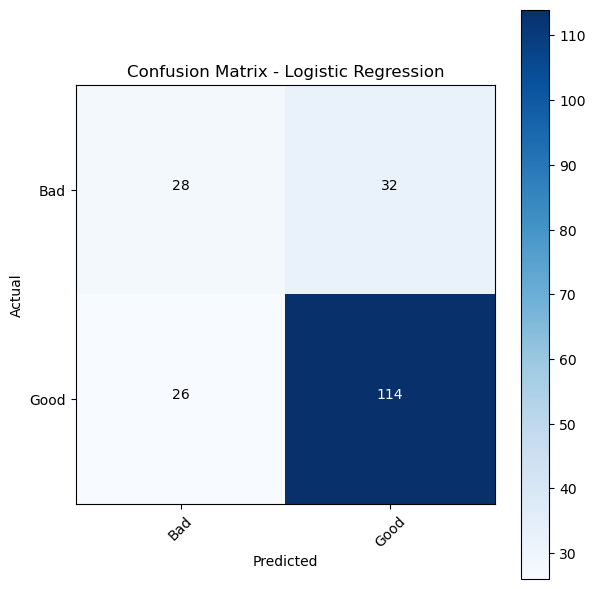


Decision Tree Performance:
Accuracy: 0.6900
Precision: 0.8000
Recall: 0.7429
F1-Score: 0.7704
ROC-AUC: 0.6548
              precision    recall  f1-score   support

           0       0.49      0.57      0.52        60
           1       0.80      0.74      0.77       140

    accuracy                           0.69       200
   macro avg       0.64      0.65      0.65       200
weighted avg       0.71      0.69      0.70       200



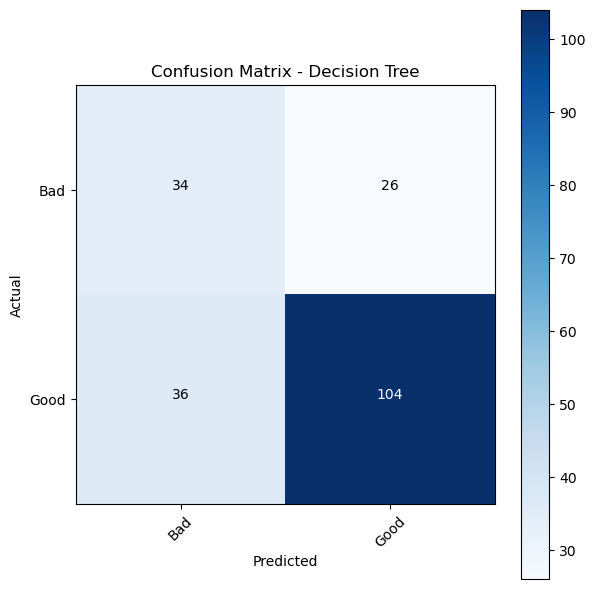


Random Forest Performance:
Accuracy: 0.7100
Precision: 0.7628
Recall: 0.8500
F1-Score: 0.8041
ROC-AUC: 0.7759
              precision    recall  f1-score   support

           0       0.52      0.38      0.44        60
           1       0.76      0.85      0.80       140

    accuracy                           0.71       200
   macro avg       0.64      0.62      0.62       200
weighted avg       0.69      0.71      0.70       200



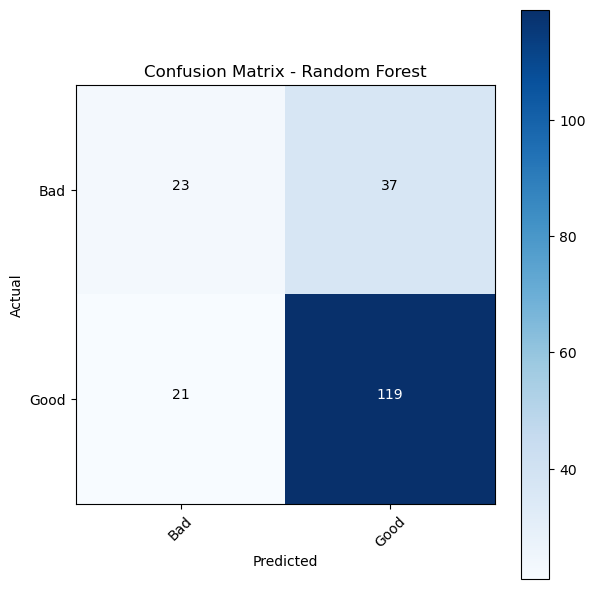


Support Vector Machine Performance:
Accuracy: 0.7500
Precision: 0.7744
Recall: 0.9071
F1-Score: 0.8355
ROC-AUC: 0.7513
              precision    recall  f1-score   support

           0       0.64      0.38      0.48        60
           1       0.77      0.91      0.84       140

    accuracy                           0.75       200
   macro avg       0.71      0.65      0.66       200
weighted avg       0.73      0.75      0.73       200



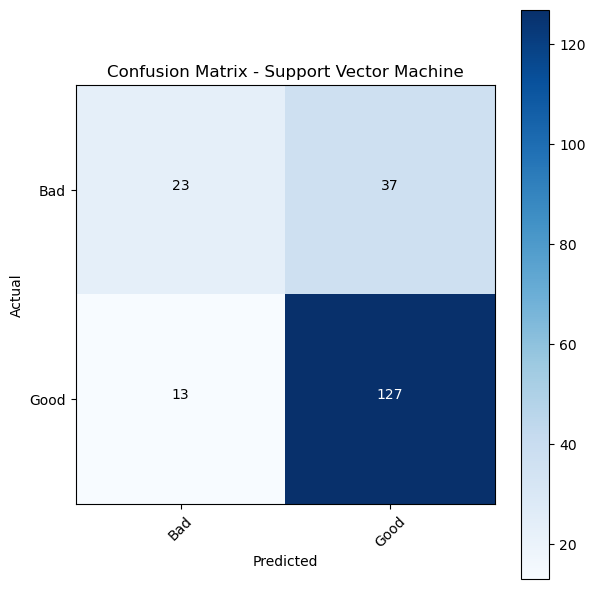

In [31]:
# Dictionary to store evaluation results
evaluation_results = {}

# Train each model and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predictions and probabilities
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    
    # Store results
    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    
    # Print evaluation summary
    print(f'\n{model_name} Performance:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    if y_proba is not None:
        print(f'ROC-AUC: {roc_auc:.4f}')
    print(classification_report(y_test, y_pred))

     # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create the confusion matrix plot
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    
    # Add text labels for each cell with the actual counts
    thresh = cm.max() / 2  # Threshold for color contrast
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    
    # Label axes and ticks
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Bad', 'Good'], rotation=45)
    plt.yticks(tick_marks, ['Bad', 'Good'])
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()




In [8]:
# Define Random Forest hyperparameters
random_forest_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=random_forest_params,
    n_iter=20,
    scoring='f1',
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)
best_rf_model = random_search.best_estimator_
print("Best Parameters for Random Forest:", random_search.best_params_)


Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}



Tuned Random Forest Performance:
Accuracy: 0.7350
Precision: 0.7702
Recall: 0.8857
F1-Score: 0.8239
ROC-AUC: 0.7707
              precision    recall  f1-score   support

           0       0.59      0.38      0.46        60
           1       0.77      0.89      0.82       140

    accuracy                           0.73       200
   macro avg       0.68      0.63      0.64       200
weighted avg       0.72      0.73      0.72       200



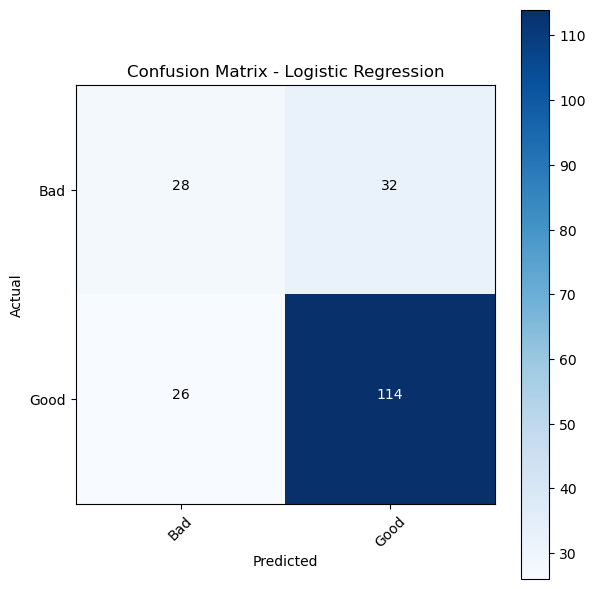

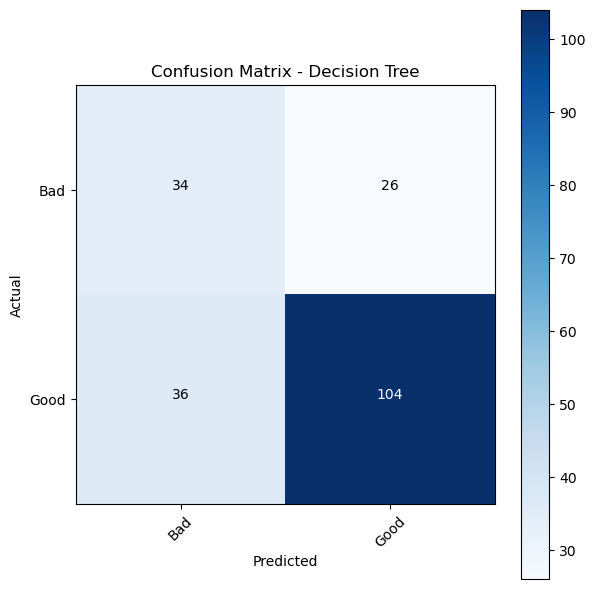

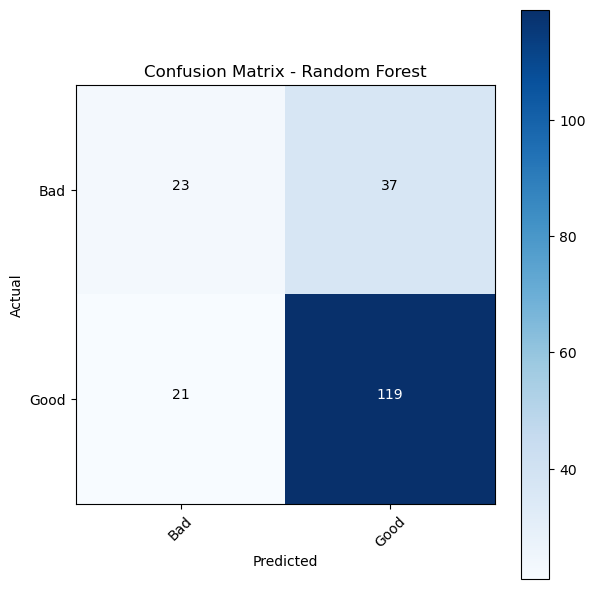

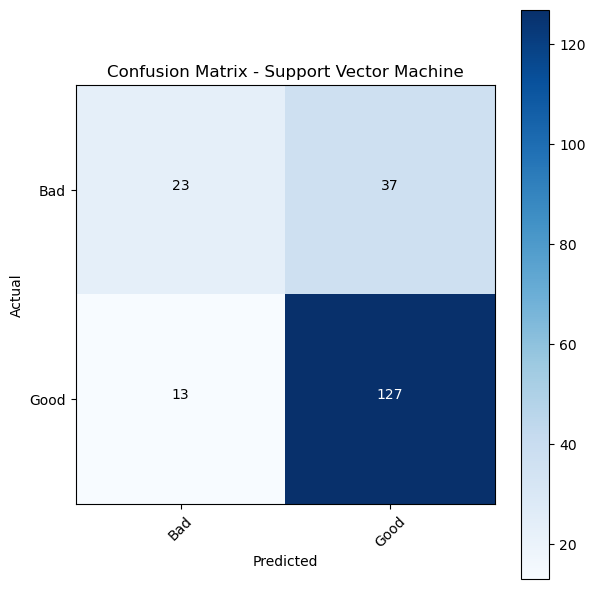

In [9]:
# Evaluate the tuned Random Forest model
y_pred = best_rf_model.predict(X_test_scaled)
y_proba = best_rf_model.predict_proba(X_test_scaled)[:, 1]

print("\nTuned Random Forest Performance:")
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_pred):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred):.4f}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}')
print(classification_report(y_test, y_pred))

# Loop through each model and display confusion matrices with numbers
for model_name, model in models.items():
    # Make predictions using the trained model
    y_pred = model.predict(X_test_scaled)
    
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create the confusion matrix plot
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    
    # Add text labels for each cell with the actual counts
    thresh = cm.max() / 2  # Threshold for color contrast
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    
    # Label axes and ticks
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Bad', 'Good'], rotation=45)
    plt.yticks(tick_marks, ['Bad', 'Good'])
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [10]:
print("\nSummary of Model Performance:")
summary_df = pd.DataFrame(evaluation_results).T
print(summary_df)



Summary of Model Performance:
                        Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression         0.71   0.780822  0.814286  0.797203  0.752619
Decision Tree               0.69   0.800000  0.742857  0.770370  0.654762
Random Forest               0.71   0.762821  0.850000  0.804054  0.775893
Support Vector Machine      0.75   0.774390  0.907143  0.835526  0.751310


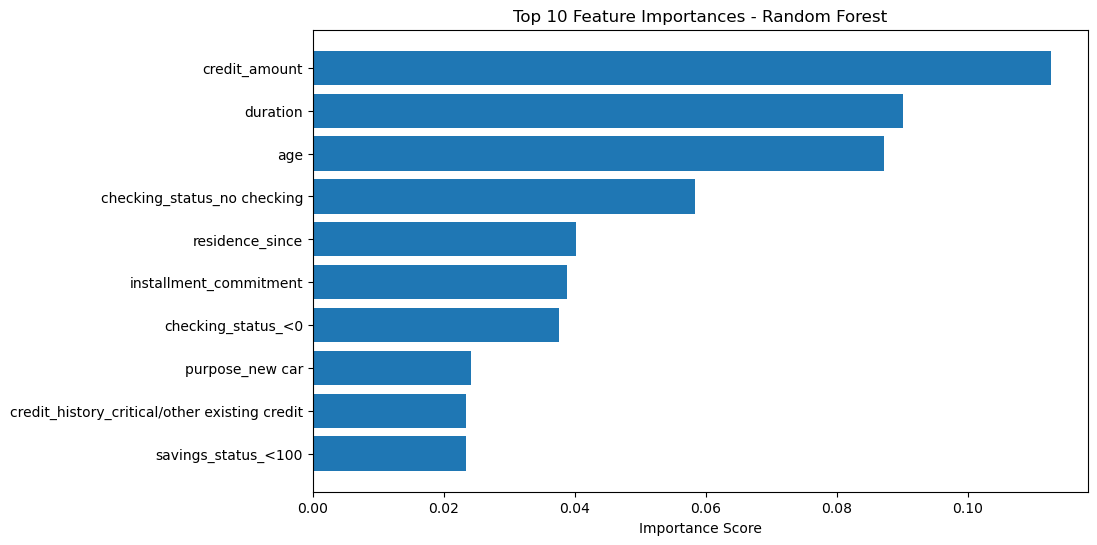

In [11]:
# Feature Importance for Random Forest
importance = best_rf_model.feature_importances_
feature_names = X_train.columns

# Sort and plot the top 10 feature importances
indices = np.argsort(importance)[-10:]
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()
